Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Clean version](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/demos/demo10/demo10.ipynb)

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Modified in class](https://colab.research.google.com/drive/1SK47cU6k9u9iE8LmH5rtDVnz2eIlghDP?usp=sharing)

# Excercise 07 -

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json
!pip install osmnx

In [ ]:
!pip install pyproj

In [ ]:
os.chdir('/content/drive/Shareddrives/URSP 688Y/Final_Project')

In [ ]:
os.listdir()

['Montgomery_County_Boundary.geojson',
 'exercise07_Haoudi_Salma.ipynb',
 'ADU_Dataset_Montgomery (1).csv',
 'metadata.json',
 'ADU_Dataset_Montgomery.geojson',
 'ADU_modified_Dataset_Montgomery.csv',
 'MoCo_data.geojson',
 'large_scale_map.eps',
 'gdf_Montgomery_wgs84.geojson',
 'gdf_montgomery_acc_wgs84 (1).geojson',
 '.ipynb_checkpoints',
 'Copy of metro_stops_montgomery_county.csv',
 'gdf_montgomery_acc_wgs84.geojson',
 'gdf_montgomery_rlu_wgs84 (1).geojson',
 'metro_stops_montgomery_county (1).csv',
 'montgomery_map.html',
 'Presentation',
 'map_with_legend.html',
 'ADU_Dataset_Montgomery.csv',
 'gdf_montgomery_rlu_wgs84.geojson',
 'gdf_montgomery_acc3_wgs84.geojson',
 'metro_stops_montgomery_county.csv',
 'ADU_Mapping_Final.ipynb',
 'Work_on_Montgomery_data.ipynb']

ADU Dataset

In [ ]:
df_montgomery = pd.read_csv('/content/drive/Shareddrives/URSP 688Y/Final_Project/ADU_Dataset_Montgomery (1).csv',thousands=',')
df_montgomery.head(7)

,ACCT,Steet Name,City,ZIP,Licence Type,Lic Status,Point X,Point Y
0,332624,Colesville Manor,SILV,20904,ACC,EX,1311838.0,516893.0
1,1741671,Friars,BETH,20817,ACC,LI,1274691.0,489341.0
2,624230,Elgin,BETH,20817,RLU,AP,1274671.0,477097.0
3,277885,Norwood,SILV,20906,RLU,AP,1310651.0,525154.0
4,40962,Trundle,DICK,20842,RLU,AP,1179133.0,542679.0
5,2158098,Colesberg,SILV,20905,ACC,EX,1318686.0,524881.0
6,388328,Berryville,GERM,20874,RLU,AP,1219885.0,515281.0


In [ ]:
license_type_counts = df_montgomery['Licence Type'].value_counts()
print(license_type_counts)

Licence Type
RLU     638
ACC     382
ACC3    135
Name: count, dtype: int64


In [ ]:
license_status_counts = df_montgomery['Lic Status'].value_counts()
print(license_status_counts)

Lic Status
AP    568
LI    273
EX    146
PE    144
FC     14
FD     10
Name: count, dtype: int64


In [ ]:
df_montgomery_acc = df_montgomery[df_montgomery['Licence Type'].str.contains(('ACC$'))]
df_montgomery_acc3 = df_montgomery[df_montgomery['Licence Type'].str.contains(('ACC3$'))]
df_montgomery_rlu = df_montgomery[df_montgomery['Licence Type'].str.startswith(('RLU'))]

In [ ]:
gdf_montgomery_acc = gpd.GeoDataFrame(df_montgomery_acc, geometry=gpd.points_from_xy(df_montgomery_acc['Point X'], df_montgomery_acc['Point Y']), crs='EPSG:2248')
gdf_montgomery_acc3 = gpd.GeoDataFrame(df_montgomery_acc3, geometry=gpd.points_from_xy(df_montgomery_acc3['Point X'], df_montgomery_acc3['Point Y']), crs='EPSG:2248')
gdf_montgomery_rlu = gpd.GeoDataFrame(df_montgomery_rlu, geometry=gpd.points_from_xy(df_montgomery_rlu['Point X'], df_montgomery_rlu['Point Y']), crs='EPSG:2248')


In [ ]:
nad83_crs = 'epsg:2248'
wgs84_crs = 'epsg:4326'
gdf_montgomery_acc_wgs84 = gdf_montgomery_acc.to_crs(wgs84_crs)
gdf_montgomery_acc3_wgs84 = gdf_montgomery_acc3.to_crs(wgs84_crs)
gdf_montgomery_rlu_wgs84 = gdf_montgomery_rlu.to_crs(wgs84_crs)

In [ ]:
import folium

In [ ]:
#montgomery map
montgomery_map = folium.Map(
    location=[39.0, -77.1],
    zoom_start=12.5,
    tiles='cartodbpositron',
    zoom_control=True,
    scrollWheelZoom=False,
    dragging=True
)


In [ ]:
gdf_montgomery_acc_wgs84.to_file("/content/drive/Shareddrives/URSP 688Y/Final_Project/ADU_Dataset_Montgomery.csv", driver='GeoJSON')
gdf_montgomery_acc3_wgs84.to_file("/content/drive/Shareddrives/URSP 688Y/Final_Project/gdf_montgomery_acc3_wgs84.geojson", driver='GeoJSON')
gdf_montgomery_rlu_wgs84.to_file("/content/drive/Shareddrives/URSP 688Y/Final_Project/gdf_montgomery_rlu_wgs84.geojson", driver='GeoJSON')

In [ ]:
#adding acc ADU units on map
adu_acc_units = gpd.read_file('gdf_montgomery_acc_wgs84.geojson')
circle_marker = folium.CircleMarker(radius = 5, weight = 0.5, color='orange', fillColor = 'orange', fill_opacity=1)
adu_acc_units_points = folium.GeoJson(adu_acc_units.to_json(), marker=circle_marker)
adu_acc_units_points.add_to(montgomery_map)

adu_acc3_units = gpd.read_file('gdf_montgomery_acc3_wgs84.geojson')
circle_marker = folium.CircleMarker(radius = 5, weight = 0.5, color='green', fillColor = 'green', fill_opacity=1)
adu_acc3_units_points = folium.GeoJson(adu_acc3_units.to_json(), marker=circle_marker)
adu_acc3_units_points.add_to(montgomery_map)

adu_rlu_units = gpd.read_file('gdf_montgomery_rlu_wgs84.geojson')
circle_marker = folium.CircleMarker(radius = 5, weight = 0.5, color='blue', fillColor = 'blue', fill_opacity=1)
adu_rlu_units_points = folium.GeoJson(adu_rlu_units.to_json(), marker=circle_marker)
adu_rlu_units_points.add_to(montgomery_map)

In [ ]:
#CODE FROM SALMA

In [ ]:
#Exercise7

import csv

#Data for the metro stops (I added data manually from coordinates)

data = [
    ['Station', 'Latitude', 'Longitude'],
    ['Rockville', '39.084215', '-77.146424'],
    ['Shady Grove', '39.12', '-77.164722'],
    ['Bethesda', '38.984652', '-77.094709'],
    ['Twinbrook', '39.062389', '-77.120778'],
    ['North Bethesda', '39.048043', '-77.113131'],
    ['Grosvernor Strasmor', '39.029188', '-77.103904'],
    ['Silver Spring', '38.993841', '-77.031321'],
    ['Medical Center', '38.999067', '-77.097676'],
    ['Friendship Heights', '38.960921', '-77.086059'],
    ['Forest Glen', '39.0153', '-77.043'],
    ['Wheaton', '39.0386', '-77.0508'],
    ['Glenmont', '39.062222', '-77.053333'],
    ['Takoma Park', '38.975532', '-77.017834'],
]

# Specify the filename
filename = 'metro_stops_montgomery_county.csv'

# Open the file in write mode
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the data
    for row in data:
        writer.writerow(row)

print(f"CSV file '{filename}' has been created successfully.")

# File path to your CSV
filename = '/content/drive/Shareddrives/URSP 688Y/Final_Project/metro_stops_montgomery_county.csv'

# Path to the GeoJSON file
geojson_file = '/content/drive/Shareddrives/URSP 688Y/Final_Project/Montgomery_County_Boundary.geojson'

geojson_file2 = '/content/drive/Shareddrives/URSP 688Y/Final_Project/gdf_Montgomery_wgs84.geojson'

# Add Montgomery County GeoJSON to the map
folium.GeoJson(geojson_file, name='Montgomery_County_Boundary').add_to(montgomery_map)


# Read data from the CSV file
with open(filename, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for station, latitude, longitude in reader:
        latitude, longitude = float(latitude), float(longitude)
        # Create a custom icon (train icon similar to metro icon)
        icon = folium.Icon(color='red', icon='train', prefix='fa')
        # Add a marker with the custom icon for each station
        folium.Marker([latitude, longitude], popup=f"{station}", icon=icon).add_to(montgomery_map)

        # Draw a circle around the station to represent a 15-minute walk area (about 1000 meters)
        folium.Circle(
            location=[latitude, longitude],
            radius=1000,  # radius in meters
            color='red',  # color of the circle's border
            fill=True,     # fill the circle with color
            fill_color='red',  # fill color
            fill_opacity=0.05  # transparency of the fill color
        ).add_to(montgomery_map)

CSV file 'metro_stops_montgomery_county.csv' has been created successfully.


In [ ]:
montgomery_map

In [ ]:
#Exercise10

from shapely.geometry import Point, shape
import json


# Define data for all stations
data = [
    ['Rockville', '39.084215', '-77.146424'],
    ['Shady Grove', '39.12', '-77.164722'],
    ['Bethesda', '38.984652', '-77.094709'],
    ['Twinbrook', '39.062389', '-77.120778'],
    ['North Bethesda', '39.048043', '-77.113131'],
    ['Grosvernor Strasmor', '39.029188', '-77.103904'],
    ['Silver Spring', '38.993841', '-77.031321'],
    ['Medical Center', '38.999067', '-77.097676'],
    ['Friendship Heights', '38.960921', '-77.086059'],
    ['Forest Glen', '39.0153', '-77.043'],
    ['Wheaton', '39.0386', '-77.0508'],
    ['Glenmont', '39.062222', '-77.053333'],
    ['Takoma Park', '38.975532', '-77.017834'],
]

# Function to calculate distances and filter ADUs within 1000m
def filter_adus_within_distance(adus, point, distance=1000):
    # Convert distance to degrees approximately (1 degree ~ 111 km)
    buffer = point.buffer(distance / 111000)  # buffer in degrees
    nearby_adus = adus[adus.intersects(buffer)]
    return nearby_adus

# Iterate over each station and process ADUs
for station, latitude, longitude in data:
    station_point = Point(longitude, latitude)  # create point object
    nearby_acc = filter_adus_within_distance(adu_acc_units, station_point)
    nearby_acc3 = filter_adus_within_distance(adu_acc3_units, station_point)
    nearby_rlu = filter_adus_within_distance(adu_rlu_units, station_point)

    # Print results for each station
    print(f"{station} - Nearby ACC units: {len(nearby_acc)}")
    print(f"{station} - Nearby ACC3 units: {len(nearby_acc3)}")
    print(f"{station} - Nearby RLU units: {len(nearby_rlu)}")

    # Add these nearby ADU points to the map with a distinct style
    #for idx, row in nearby_acc.iterrows():
        #folium.CircleMarker(location=[row.geometry.y, row.geometry.x], radius=5, color='green', fill=True, popup=f"{station} - ACC").add_to(montgomery_map)

    #for idx, row in nearby_acc3.iterrows():
        #folium.CircleMarker(location=[row.geometry.y, row.geometry.x], radius=5, color='purple', fill=True, popup=f"{station} - ACC3").add_to(montgomery_map)

    #for idx, row in nearby_rlu.iterrows():
        #folium.CircleMarker(location=[row.geometry.y, row.geometry.x], radius=5, color='orange', fill=True, popup=f"{station} - RLU").add_to(montgomery_map)


Rockville - Nearby ACC units: 0
Rockville - Nearby ACC3 units: 0
Rockville - Nearby RLU units: 0
Shady Grove - Nearby ACC units: 0
Shady Grove - Nearby ACC3 units: 0
Shady Grove - Nearby RLU units: 0
Bethesda - Nearby ACC units: 2
Bethesda - Nearby ACC3 units: 4
Bethesda - Nearby RLU units: 11
Twinbrook - Nearby ACC units: 0
Twinbrook - Nearby ACC3 units: 0
Twinbrook - Nearby RLU units: 0
North Bethesda - Nearby ACC units: 0
North Bethesda - Nearby ACC3 units: 0
North Bethesda - Nearby RLU units: 0
Grosvernor Strasmor - Nearby ACC units: 3
Grosvernor Strasmor - Nearby ACC3 units: 0
Grosvernor Strasmor - Nearby RLU units: 3
Silver Spring - Nearby ACC units: 2
Silver Spring - Nearby ACC3 units: 2
Silver Spring - Nearby RLU units: 0
Medical Center - Nearby ACC units: 1
Medical Center - Nearby ACC3 units: 6
Medical Center - Nearby RLU units: 2
Friendship Heights - Nearby ACC units: 0
Friendship Heights - Nearby ACC3 units: 0
Friendship Heights - Nearby RLU units: 1
Forest Glen - Nearby ACC

In [ ]:
from geopandas.tools import sjoin

# Function to get all ADUs within 1000m of a given metro station
def get_adus_within_distance(station_point, adus, max_distance=1000):
    # Calculate distances in degrees (approximation where 1 degree ~ 111 km)
    buffer = station_point.buffer(max_distance / 111000)
    nearby_adus = adus[adus.intersects(buffer)]
    return nearby_adus




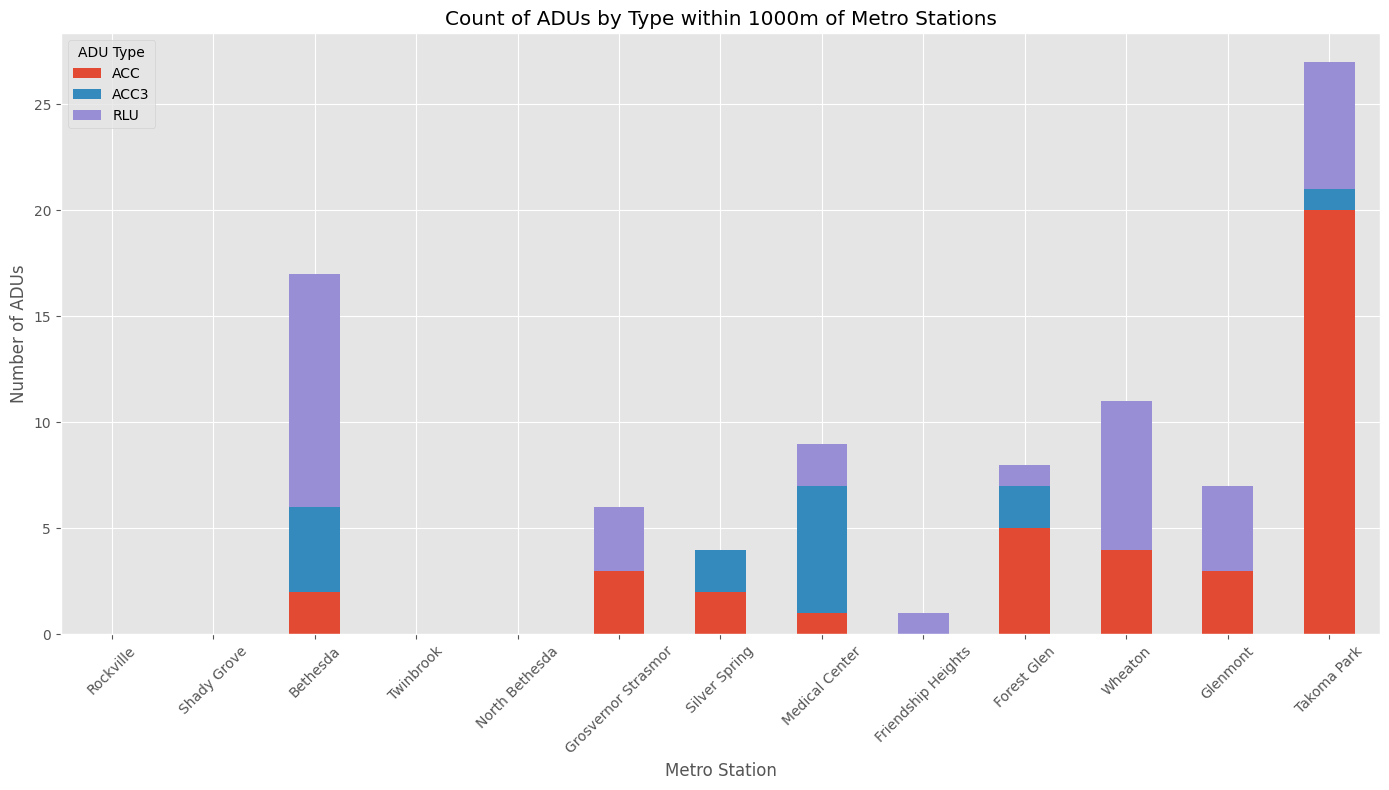

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the data as a list of dictionaries
data = [
    {'Station': 'Rockville', 'ACC': 0, 'ACC3': 0, 'RLU': 0},
    {'Station': 'Shady Grove', 'ACC': 0, 'ACC3': 0, 'RLU': 0},
    {'Station': 'Bethesda', 'ACC': 2, 'ACC3': 4, 'RLU': 11},
    {'Station': 'Twinbrook', 'ACC': 0, 'ACC3': 0, 'RLU': 0},
    {'Station': 'North Bethesda', 'ACC': 0, 'ACC3': 0, 'RLU': 0},
    {'Station': 'Grosvernor Strasmor', 'ACC': 3, 'ACC3': 0, 'RLU': 3},
    {'Station': 'Silver Spring', 'ACC': 2, 'ACC3': 2, 'RLU': 0},
    {'Station': 'Medical Center', 'ACC': 1, 'ACC3': 6, 'RLU': 2},
    {'Station': 'Friendship Heights', 'ACC': 0, 'ACC3': 0, 'RLU': 1},
    {'Station': 'Forest Glen', 'ACC': 5, 'ACC3': 2, 'RLU': 1},
    {'Station': 'Wheaton', 'ACC': 4, 'ACC3': 0, 'RLU': 7},
    {'Station': 'Glenmont', 'ACC': 3, 'ACC3': 0, 'RLU': 4},
    {'Station': 'Takoma Park', 'ACC': 20, 'ACC3': 1, 'RLU': 6}
]


# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Set the style for better aesthetics
plt.style.use('ggplot')

# Create a bar chart
ax = df.set_index('Station').plot(kind='bar', stacked=True, figsize=(14, 8))

# Add titles and labels
plt.title('Count of ADUs by Type within 1000m of Metro Stations')
plt.xlabel('Metro Station')
plt.ylabel('Number of ADUs')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='ADU Type')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import folium
from shapely.geometry import Point

# Ensure montgomery_map is initialized correctly
# montgomery_map = folium.Map(location=[39.0, -77.1], zoom_start=12, tiles='cartodbpositron')

# Function to calculate distances and filter ADUs within 1000m
def get_adus_within_distance(station_point, adus, max_distance=1000):
    buffer = station_point.buffer(max_distance / 111000)  # buffer in degrees
    return adus[adus.intersects(buffer)]

# Iterate over each station and process ADUs
for station_data in data:
    station_name, latitude, longitude = station_data['Station'], float(station_data['Latitude']), float(station_data['Longitude'])
    station_point = Point(longitude, latitude)  # Point(long, lat) for shapely

    # Assuming 'adu_acc_units', 'adu_acc3_units', 'adu_rlu_units' are defined and are GeoDataFrames
    adus_within_acc = get_adus_within_distance(station_point, adu_acc_units)
    adus_within_acc3 = get_adus_within_distance(station_point, adu_acc3_units)
    adus_within_rlu = get_adus_within_distance(station_point, adu_rlu_units)

    # Draw lines to all nearby ADUs
    for adu_type, adus in [('ACC', adus_within_acc), ('ACC3', adus_within_acc3), ('RLU', adus_within_rlu)]:
        color = 'orange' if adu_type == 'ACC' else 'green' if adu_type == 'ACC3' else 'blue'
        for idx, adu in adus.iterrows():
            adu_lat, adu_lon = adu.geometry.y, adu.geometry.x
            folium.PolyLine(locations=[(latitude, longitude), (adu_lat, adu_lon)], color=color, weight=1.5).add_to(montgomery_map)

# Display the updated map
montgomery_map


KeyError: 'Latitude'

In [ ]:
# Define data as a list of lists explicitly
data = [
    ['Rockville', '39.084215', '-77.146424'],
    ['Shady Grove', '39.12', '-77.164722'],
    ['Bethesda', '38.984652', '-77.094709'],
    ['Twinbrook', '39.062389', '-77.120778'],
    ['North Bethesda', '39.048043', '-77.113131'],
    ['Grosvernor Strasmor', '39.029188', '-77.103904'],
    ['Silver Spring', '38.993841', '-77.031321'],
    ['Medical Center', '38.999067', '-77.097676'],
    ['Friendship Heights', '38.960921', '-77.086059'],
    ['Forest Glen', '39.0153', '-77.043'],
    ['Wheaton', '39.0386', '-77.0508'],
    ['Glenmont', '39.062222', '-77.053333'],
    ['Takoma Park', '38.975532', '-77.017834'],
]

# Ensure the loop accesses list indices correctly
for station_data in data:
    station_name = station_data[0]  # Name of the station
    latitude = float(station_data[1])  # Latitude, convert string to float
    longitude = float(station_data[2])  # Longitude, convert string to float

    station_point = Point(longitude, latitude)  # Create a Point object with (longitude, latitude)

    # The rest of your code to process the data
    # Example: Print to check the output
    print(f'Station: {station_name}, Latitude: {latitude}, Longitude: {longitude}')


Station: Rockville, Latitude: 39.084215, Longitude: -77.146424
Station: Shady Grove, Latitude: 39.12, Longitude: -77.164722
Station: Bethesda, Latitude: 38.984652, Longitude: -77.094709
Station: Twinbrook, Latitude: 39.062389, Longitude: -77.120778
Station: North Bethesda, Latitude: 39.048043, Longitude: -77.113131
Station: Grosvernor Strasmor, Latitude: 39.029188, Longitude: -77.103904
Station: Silver Spring, Latitude: 38.993841, Longitude: -77.031321
Station: Medical Center, Latitude: 38.999067, Longitude: -77.097676
Station: Friendship Heights, Latitude: 38.960921, Longitude: -77.086059
Station: Forest Glen, Latitude: 39.0153, Longitude: -77.043
Station: Wheaton, Latitude: 39.0386, Longitude: -77.0508
Station: Glenmont, Latitude: 39.062222, Longitude: -77.053333
Station: Takoma Park, Latitude: 38.975532, Longitude: -77.017834


In [ ]:
import folium
from shapely.geometry import Point

# Assuming montgomery_map is already initialized:
# montgomery_map = folium.Map(location=[39.0, -77.1], zoom_start=12, tiles='cartodbpositron')

for station_data in data:
    station_name, latitude, longitude = station_data[0], float(station_data[1]), float(station_data[2])
    station_point = Point(longitude, latitude)  # Create a Shapely point (ensure longitude first)

    # Assuming adu_acc_units, adu_acc3_units, and adu_rlu_units are properly defined GeoDataFrames
    adus_within_acc = get_adus_within_distance(station_point, adu_acc_units)
    adus_within_acc3 = get_adus_within_distance(station_point, adu_acc3_units)
    adus_within_rlu = get_adus_within_distance(station_point, adu_rlu_units)

    # Example color coding for the line types
    colors = {'ACC': 'orange', 'ACC3': 'green', 'RLU': 'blue'}

    # Draw lines to all nearby ADUs
    for adu_set, color in zip([adus_within_acc, adus_within_acc3, adus_within_rlu], ['orange', 'green', 'blue']):
        for idx, adu in adu_set.iterrows():
            adu_lat, adu_lon = adu.geometry.y, adu.geometry.x
            folium.PolyLine(locations=[(latitude, longitude), (adu_lat, adu_lon)], color=color, weight=1.5).add_to(montgomery_map)

# Display the updated map
montgomery_map
